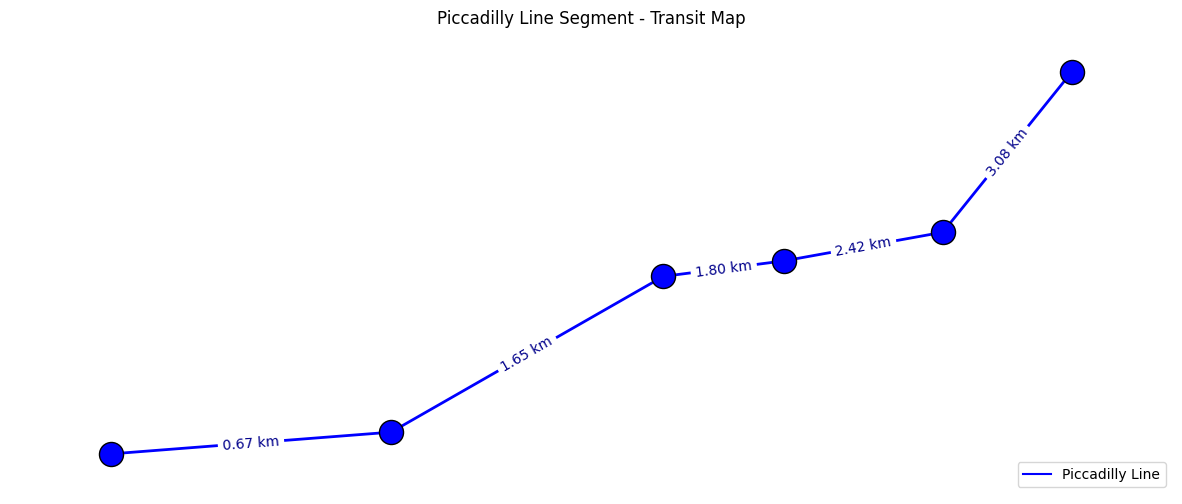

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Define station names
stations = [
    "Hyde Park Corner",
    "Green Park",
    "Piccadilly Circus",
    "Leicester Square",
    "Covent Garden",
    "Holborn"
]

# Define the graph
G = nx.Graph()

# Add nodes with coordinates (longitude, latitude)
station_coords = {
    "Hyde Park Corner": (-0.1536086946334523, 51.503210590805736),
    "Green Park": (-0.14379477147206865, 51.50403198637279),
    "Piccadilly Circus": (-0.13425944466638207, 51.50991309108146),
    "Leicester Square": (-0.1300261428150066, 51.510499795048304),
    "Covent Garden": (-0.12446885967234843, 51.511581150787364),
    "Holborn": (-0.11995777331875236, 51.517627472231155)
}

# station_coords = {
#     "Hyde Park Corner": (10, 10),
#     "Green Park": (40, 40),
#     "Piccadilly Circus": (90, 40),
#     "Leicester Square": (170, 40),
#     "Covent Garden": (230, 100),
#     "Holborn": (290, 180)
# }

# Adding nodes to the graph
for station, coord in station_coords.items():
    G.add_node(station, pos=coord)

# Define edges with distances (km)
edges = [
    ("Hyde Park Corner", "Green Park", 0.67),
    ("Green Park", "Piccadilly Circus", 1.65),
    ("Piccadilly Circus", "Leicester Square", 1.80),
    ("Leicester Square", "Covent Garden", 2.42),
    ("Covent Garden", "Holborn", 3.08)
]

# Add edges to the graph
for station1, station2, distance in edges:
    G.add_edge(station1, station2, distance=f"{distance:.2f} km")

# Get positions from node attributes
pos = nx.get_node_attributes(G, 'pos')

# Adjust positions for labels (slightly above each node) based on (long, lat)
# label_pos = {node: (x, y + 0.001) for node, (x, y) in pos.items()}

label_pos = {node: (x - 11, y + 10) for node, (x, y) in pos.items()}

# Plotting
plt.figure(figsize=(15, 6))

# Draw nodes with enhanced styling
nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=300, edgecolors='black')

# Draw edges with different color and style
nx.draw_networkx_edges(G, pos, edge_color='blue', width=2)

# Draw node labels with adjusted positions
nx.draw_networkx_labels(G, label_pos, font_size=10, font_color='black')

# Draw edge labels with distances
edge_labels = nx.get_edge_attributes(G, 'distance')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='darkblue')

# Add a custom legend
plt.plot([], [], color="blue", label="Piccadilly Line")  # Dummy plot for legend
plt.legend(loc="lower right")

# Display the title and remove axes
plt.title("Piccadilly Line Segment - Transit Map")
plt.axis("off")
plt.show()
